#### 1. Develop a program to build and train a **Feedforward Neural Network** from scratch using a deep learning framework like TensorFlow, keras etc. 
Binary Classification on a simple dummy dataset, generated using `make_classification`.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Input  # type: ignore
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
18/18 [==============================] - 1s 9ms/step - loss: 0.6666 - accuracy: 0.5661 - val_loss: 0.6104 - val_accuracy: 0.7071
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.8143 - val_loss: 0.5299 - val_accuracy: 0.8143
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8696 - val_loss: 0.4564 - val_accuracy: 0.8714
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8839 - val_loss: 0.3959 - val_accuracy: 0.8857
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.9054 - val_loss: 0.3573 - val_accuracy: 0.8857
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.9179 - val_loss: 0.3248 - val_accuracy: 0.9000
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.9268 - val_loss: 0.2962 - val_accuracy: 0.8929
Epoch 8/20
18/18 [==

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 0.1763
Test Accuracy: 93.33%


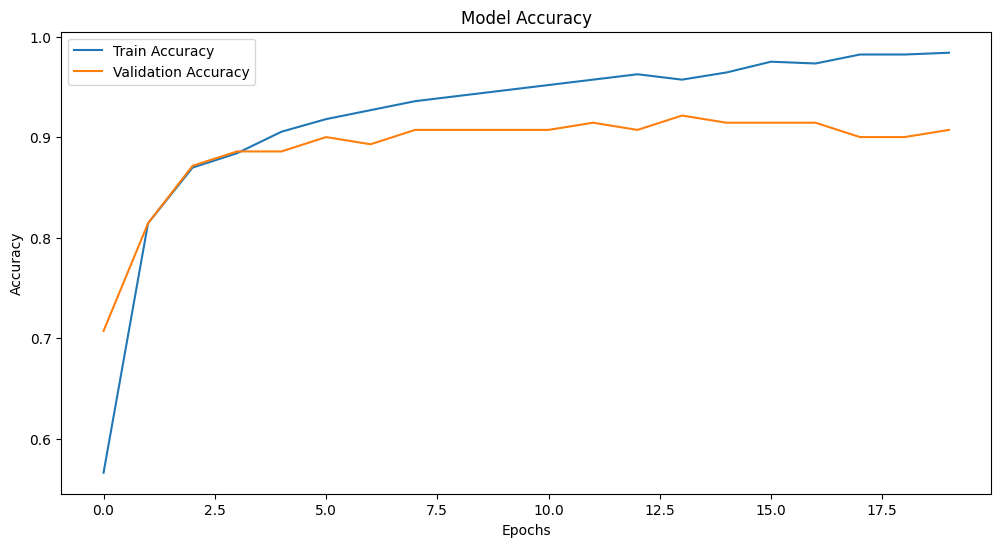

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()